In [1]:
import pandas
import geopandas
import h3
from shapely import wkt
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

In [3]:
censo_df = pandas.read_csv("/media/gegen07/Expansion/data/df_GeoCenso_2010.csv", index_col=0) 

/tmp/ipykernel_241602/550687483.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  censo_df = pandas.read_csv("/media/gegen07/Expansion/data/df_GeoCenso_2010.csv", index_col=0)


In [4]:
censo_df['geometry'] = censo_df.geometry.apply(wkt.loads)
gdf = geopandas.GeoDataFrame(censo_df, geometry="geometry")

In [5]:
gdf

,Cod_bairro,Cod_distrito,Cod_meso,Cod_municipio,Cod_subdistrito,Nome_Grande_Regiao,Nome_da_UF,Nome_do_municipio,Nome_do_subdistrito,Situacao_setor,...,n_idade_51_60,n_idade_61_70,n_idade_71_100,n_indigenas,n_moradores,n_mulheres,n_pardos,n_pretos,variancia_moradores_por_domicilio,geometry
110001505000001,1.100015e+09,110001505.0,1102.0,1100015.0,11000150500,Região Norte,Rondônia,ALTA FLORESTA D'OESTE,ALTA FLORESTA D'OESTE,1.0,...,82.0,52.0,36.0,2.0,956.0,497.0,441.0,35.0,1.91,"POLYGON ((-62.00258 -11.92904, -62.00140 -11.9..."
110001505000002,1.100015e+09,110001505.0,1102.0,1100015.0,11000150500,Região Norte,Rondônia,ALTA FLORESTA D'OESTE,ALTA FLORESTA D'OESTE,1.0,...,75.0,40.0,27.0,0.0,859.0,435.0,404.0,57.0,2.39,"POLYGON ((-62.00403 -11.93316, -62.00385 -11.9..."
110001505000003,1.100015e+09,110001505.0,1102.0,1100015.0,11000150500,Região Norte,Rondônia,ALTA FLORESTA D'OESTE,ALTA FLORESTA D'OESTE,1.0,...,43.0,31.0,27.0,3.0,661.0,333.0,332.0,97.0,1.96,"POLYGON ((-62.00379 -11.92907, -62.00375 -11.9..."
110001505000004,1.100015e+09,110001505.0,1102.0,1100015.0,11000150500,Região Norte,Rondônia,ALTA FLORESTA D'OESTE,ALTA FLORESTA D'OESTE,1.0,...,26.0,12.0,11.0,6.0,266.0,125.0,137.0,18.0,2.67,"POLYGON ((-61.99904 -11.91873, -61.99902 -11.9..."
110001505000005,1.100015e+09,110001505.0,1102.0,1100015.0,11000150500,Região Norte,Rondônia,ALTA FLORESTA D'OESTE,ALTA FLORESTA D'OESTE,1.0,...,70.0,73.0,47.0,6.0,1206.0,585.0,734.0,56.0,3.11,"POLYGON ((-62.00642 -11.91887, -62.00630 -11.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530010805300153,5.300108e+09,530010805.0,5301.0,5300108.0,53001080530.0,Região Centro-Oeste,Distrito Federal,BRASÍLIA,SÃO SEBASTIÃO,1.0,...,59.0,18.0,12.0,5.0,434.0,223.0,105.0,13.0,1.97,"POLYGON ((-47.81165 -15.86005, -47.80981 -15.8..."
530010805300154,5.300108e+09,530010805.0,5301.0,5300108.0,53001080530.0,Região Centro-Oeste,Distrito Federal,BRASÍLIA,SÃO SEBASTIÃO,1.0,...,56.0,30.0,15.0,0.0,534.0,276.0,101.0,22.0,2.12,"POLYGON ((-47.81951 -15.86180, -47.81866 -15.8..."
530010805300155,5.300108e+09,530010805.0,5301.0,5300108.0,53001080530.0,Região Centro-Oeste,Distrito Federal,BRASÍLIA,SÃO SEBASTIÃO,1.0,...,76.0,24.0,9.0,3.0,532.0,266.0,150.0,16.0,2.08,"POLYGON ((-47.81758 -15.85556, -47.81269 -15.8..."
530010805300156,5.300108e+09,530010805.0,5301.0,5300108.0,53001080530.0,Região Centro-Oeste,Distrito Federal,BRASÍLIA,SÃO SEBASTIÃO,1.0,...,61.0,16.0,7.0,24.0,2103.0,1044.0,1140.0,361.0,3.05,"POLYGON ((-47.78410 -15.90137, -47.78145 -15.9..."


In [6]:
gdf_bairros = gdf.dissolve(by='Cod_bairro', aggfunc='mean')

/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/geopandas/geodataframe.py:1531: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc)


In [10]:
gdf_bairros = gdf_bairros.merge(gdf[["Cod_bairro", "Cod_subdistrito", "Nome_Grande_Regiao", "Nome_da_UF", "Nome_do_municipio", "Nome_do_subdistrito"]], on="Cod_bairro")

In [12]:
gdf_bairros["Nome_da_UF"].unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraiba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'SÃ£o Paulo',
       'São Paulo', 'Paraná', 'Santa Catarina', 'Mato Grosso do Sul',
       'Mato Grosso', 'Goiás', 'Distrito Federal'], dtype=object)

In [14]:
df = gdf_bairros[gdf_bairros["Nome_da_UF"]=="Distrito Federal"]
rj = gdf_bairros[gdf_bairros["Nome_da_UF"]=="Rio de Janeiro"]
pa = gdf_bairros[gdf_bairros["Nome_da_UF"]=="Pará"]

/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


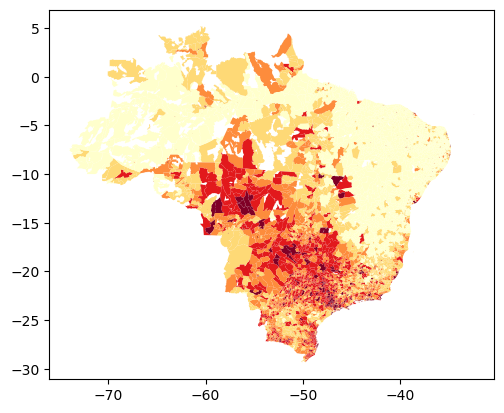

In [18]:
gdf_bairros.plot(column = 'media_rendimento_medio_por_morador_com_renda', scheme='quantiles', cmap='YlOrRd');

/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/mapclassify/classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 1.
  warnings.warn(


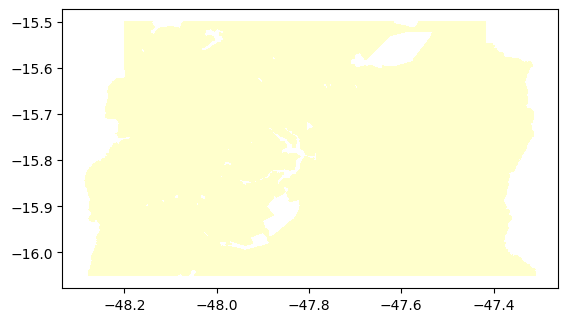

In [20]:
df.plot(column = 'media_rendimento_medio_por_morador_com_renda', scheme='quantiles', cmap='YlOrRd');

/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


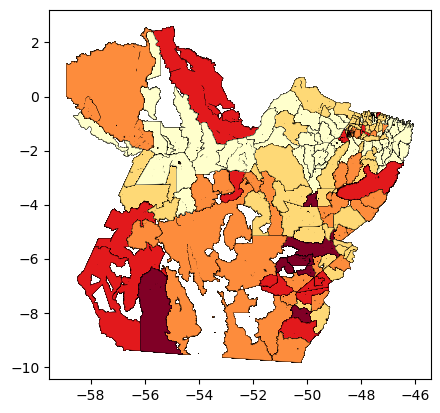

In [29]:
pa.plot(column = 'media_rendimento_medio_por_morador_com_renda', scheme='quantiles', cmap='YlOrRd', edgecolor="black", linewidth=0.2);

/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


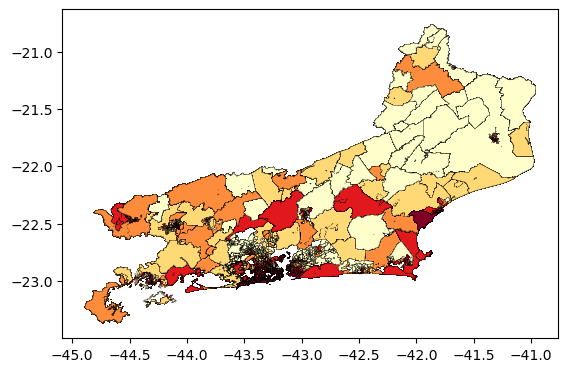

In [28]:
rj.plot(column = 'media_rendimento_medio_por_morador_com_renda', scheme='quantiles', cmap='YlOrRd', edgecolor="black", linewidth=0.2);

## Aereal Interpolation

In [2]:
def circumradius(resolution):
    """Find the circumradius of an h3 hexagon at given resolution.

     Parameters
    ----------
    resolution : int
        h3 grid resolution

    Returns
    -------
    circumradius : float
        circumradius in meters
    """
    try:
        import h3
    except ImportError:
        raise ImportError(
            "This function requires the `h3` library. "
            "You can install it with `conda install h3-py` or "
            "`pip install h3`"
        )

    return h3.edge_length(resolution, "m")

def _to_hex(source, resolution=6, return_geoms=True, buffer=True):
    """Generate a hexgrid geodataframe that covers the face of a source geometry.

    Parameters
    ----------
    source : geometry
        geometry to transform into a hexagonal grid (needs to support __geo_interface__)
    resolution : int, optional (default is 6)
        resolution of output h3 hexgrid.
        See <https://h3geo.org/docs/core-library/restable> for more information
    return_geoms: bool, optional (default is True)
        whether to generate hexagon geometries as a geodataframe or simply return
        hex ids as a pandas.Series

    Returns
    -------
    pandas.Series or geopandas.GeoDataFrame
        if `return_geoms` is True, a geopandas.GeoDataFrame whose rows comprise a hexagonal h3 grid (indexed on h3 hex id).
        if `return_geoms` is False, a pandas.Series of h3 hexagon ids
    """
    try:
        import h3
    except ImportError:
        raise ImportError(
            "This function requires the `h3` library. "
            "You can install it with `conda install h3-py` or "
            "`pip install h3`"
        )

    hexids = pandas.Series(
        list(
            h3.polyfill(
                source.__geo_interface__,
                resolution,
                geo_json_conformant=True,
            )
        ),
        name="hex_id",
    )

    if not return_geoms:
        return hexids

    polys = hexids.apply(
        lambda hex_id: Polygon(h3.h3_to_geo_boundary(hex_id, geo_json=True)),
    )

    hexs = geopandas.GeoDataFrame(hexids, geometry=polys, crs=4326).set_index("hex_id")

    return hexs

def h3fy(source, resolution=6, clip=False, buffer=False, return_geoms=True):
    """Generate a hexgrid geodataframe that covers the face of a source geodataframe.

    Parameters
    ----------
    source : geopandas.GeoDataFrame
        GeoDataFrame to transform into a hexagonal grid
    resolution : int, optional (default is 6)
        resolution of output h3 hexgrid.
        See <https://h3geo.org/docs/core-library/restable> for more information
    clip : bool, optional (default is False)
        if True, hexagons are clipped by the boundary of the source gdf. Otherwise,
        heaxgons along the boundary will be left intact.
    buffer : bool, optional (default is False)
        if True, force hexagons to completely fill the interior of the source area.
        if False, (h3 default) may result in empty areas within the source area.
    return_geoms: bool, optional (default is True)
        whether to generate hexagon geometries as a geodataframe or simply return
        hex ids as a pandas.Series

    Returns
    -------
    pandas.Series or geopandas.GeoDataFrame
        if `return_geoms` is True, a geopandas.GeoDataFrame whose rows comprise a hexagonal h3 grid (indexed on h3 hex id).
        if `return_geoms` is False, a pandas.Series of h3 hexagon ids
    """
    # h3 hexes only work on polygons, not multipolygons
    if source.crs is None:
        raise ValueError(
            "source geodataframe must have a valid CRS set before using this function"
        )

    orig_crs = source.crs
    clipper = source

    if source.crs.is_geographic:
        if buffer:  # if CRS is geographic but user wants a buffer, we need to estimate
            warn(
                "The source geodataframe is stored in a geographic CRS. Falling back to estimated UTM zone "
                "to generate desired buffer. If this produces unexpected results, reproject the input data "
                "prior to using this function"
            )
            source = (
                source.to_crs(source.estimate_utm_crs())
                .buffer(circumradius(resolution))
                .to_crs(4326)
            )

    else:  # if CRS is projected, we need lat/long
        crs_units = source.crs.to_dict()["units"]
        if buffer:  #  we can only convert between units we know
            if not crs_units in ["m", "us-ft"]:
                raise ValueError(
                    f"The CRS of source geodataframe uses an unknown measurement unit: `{crs_units}`. "
                    "The `buffer` argument requires either a geographic CRS or a projected one measured "
                    "in meters or feet (U.S.)"
                )
            clipper = source.to_crs(4326)
            distance = circumradius(resolution)
            if crs_units == "ft-us":
                distance = distance * 3.281
            source = source.buffer(distance).to_crs(4326)
        else:
            source = source.to_crs(4326)

    source_unary = source.unary_union

    if type(source_unary) == Polygon:
        hexagons = _to_hex(
            source_unary, resolution=resolution, return_geoms=return_geoms
        )
    else:
        output = []
        for geom in source_unary.geoms:
            hexes = _to_hex(geom, resolution=resolution, return_geoms=return_geoms)
            output.append(hexes)
        hexagons = pandas.concat(output)

    if return_geoms and clip:
        hexagons = geopandas.clip(hexagons, clipper)

    if return_geoms and not hexagons.crs.equals(orig_crs):
        hexagons = hexagons.to_crs(orig_crs)

    return hexagons

In [4]:
rj = pandas.read_csv("/media/gegen07/Expansion/data/rj-censo-bairros-2010.csv")

In [6]:
rj['geometry'] = rj.geometry.apply(wkt.loads)
rj = geopandas.GeoDataFrame(rj, geometry="geometry")

In [8]:
rj_hex_clipped = h3fy(rj.set_crs("EPSG:4326"), resolution=6)

/tmp/ipykernel_247916/381556625.py:54: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hexids = pandas.Series(
/tmp/ipykernel_247916/381556625.py:54: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hexids = pandas.Series(
/tmp/ipykernel_247916/381556625.py:54: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hexids = pandas.Series(
/tmp/ipykernel_247916/381556625.py:54: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hexids = pandas.Series(
/tmp/ipykernel_247916/381556625.py:54: FutureWarning: The default dtype for empty Series will be

In [9]:
rj_hex_clipped

,geometry
hex_id,
86a8a112fffffff,"POLYGON ((-44.56557 -22.92806, -44.53638 -22.9..."
86a8a180fffffff,"POLYGON ((-44.69893 -23.09705, -44.66973 -23.0..."
86a8a1977ffffff,"POLYGON ((-44.76762 -23.25697, -44.73842 -23.2..."
86a8a195fffffff,"POLYGON ((-44.78652 -23.15901, -44.75732 -23.1..."
86a8a1957ffffff,"POLYGON ((-44.74472 -23.20370, -44.71552 -23.1..."
...,...
86a8a56dfffffff,"POLYGON ((-44.33742 -23.24946, -44.30821 -23.2..."
86a8a1d1fffffff,"POLYGON ((-44.18505 -23.17846, -44.15585 -23.1..."
86a8a06afffffff,"POLYGON ((-43.20990 -22.89072, -43.18072 -22.8..."


(-45.070102897269464,
 -40.75853909510152,
 -23.51248669700758,
 -20.644957027641556)

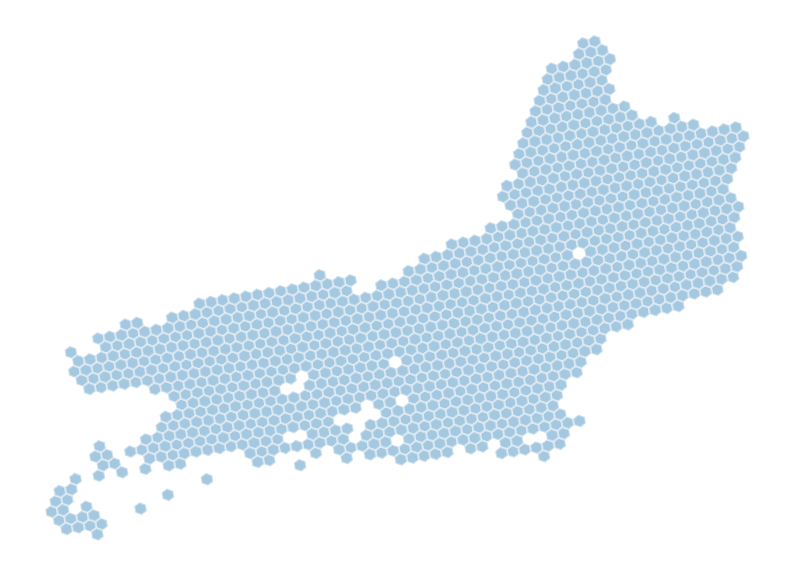

In [48]:
fig, ax = plt.subplots(figsize=(10,10))

rj_hex_clipped.plot(ax=ax, alpha=0.4, linewidth=1.6, edgecolor='white')
ax.axis('off')

In [10]:
from tobler.area_weighted import area_interpolate

/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
rj.columns

Index(['Cod_bairro', 'geometry', 'Cod_distrito', 'Cod_meso', 'Cod_municipio',
       'Situacao_setor', 'Tipo_setor', 'media_moradores_por_domicilio',
       'media_rendimento_medio_por_morador_com_ou_sem_renda',
       'media_rendimento_medio_por_morador_com_renda',
       'media_rendimento_medio_por_morador_reponsavel_com_ou_sem_Renda',
       'media_rendimento_medio_por_morador_responsavel_com_renda',
       'n_alfabetizados_homens', 'n_alfabetizados_mulheres', 'n_amarelos',
       'n_brancos', 'n_domicilios', 'n_homens', 'n_idade_0_10',
       'n_idade_11_20', 'n_idade_21_30', 'n_idade_31_40', 'n_idade_41_50',
       'n_idade_51_60', 'n_idade_61_70', 'n_idade_71_100', 'n_indigenas',
       'n_moradores', 'n_mulheres', 'n_pardos', 'n_pretos',
       'variancia_moradores_por_domicilio', 'Cod_subdistrito',
       'Nome_Grande_Regiao', 'Nome_da_UF', 'Nome_do_municipio',
       'Nome_do_subdistrito'],
      dtype='object')

In [12]:
to_interpolate = ['media_moradores_por_domicilio',
       'media_rendimento_medio_por_morador_com_ou_sem_renda',
       'media_rendimento_medio_por_morador_com_renda',
       'media_rendimento_medio_por_morador_reponsavel_com_ou_sem_Renda',
       'media_rendimento_medio_por_morador_responsavel_com_renda',
       'n_alfabetizados_homens', 'n_alfabetizados_mulheres', 'n_amarelos',
       'n_brancos', 'n_domicilios', 'n_homens', 'n_idade_0_10',
       'n_idade_11_20', 'n_idade_21_30', 'n_idade_31_40', 'n_idade_41_50',
       'n_idade_51_60', 'n_idade_61_70', 'n_idade_71_100', 'n_indigenas',
       'n_moradores', 'n_mulheres', 'n_pardos', 'n_pretos',
       'variancia_moradores_por_domicilio']

In [13]:
rj_hex_interpolated = area_interpolate(source_df=rj.set_crs("EPSG:4326"), target_df=rj_hex_clipped, intensive_variables=to_interpolate)

/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/tobler/area_weighted/area_interpolate.py:254: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  den = source_df[source_df.geometry.name].area.values
/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/tobler/util/util.py:28: UserWarning: nan values in variable: n_alfabetizados_homens, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")
/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/tobler/util/util.py:28: UserWarning: nan values in variable: n_alfabetizados_mulheres, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")
/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/tobler/util/util.py:28: UserWarning: nan values in variable: n_amarelos, replacing with 0
  warn(f"nan values in variable: {

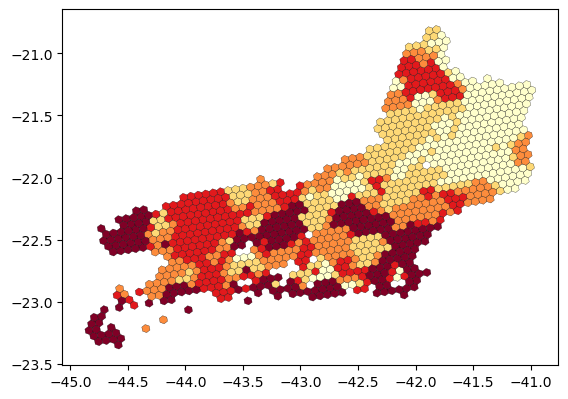

In [55]:
rj_hex_interpolated.plot(column = 'media_rendimento_medio_por_morador_com_renda', scheme='quantiles', cmap='YlOrRd', edgecolor="black", linewidth=0.2);

In [17]:
rj_hex_interpolated.to_csv("/media/gegen07/Expansion/data/rj_interpolated_res_6.csv", index=False)

#### Pará

In [58]:
pa_hex_clipped = h3fy(pa.set_crs("EPSG:4326"), resolution=6)

/tmp/ipykernel_241602/381556625.py:54: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hexids = pandas.Series(
/tmp/ipykernel_241602/381556625.py:54: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hexids = pandas.Series(
/tmp/ipykernel_241602/381556625.py:54: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hexids = pandas.Series(
/tmp/ipykernel_241602/381556625.py:54: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hexids = pandas.Series(
/tmp/ipykernel_241602/381556625.py:54: FutureWarning: The default dtype for empty Series will be

In [62]:
pa_hex_clipped

,geometry
hex_id,
868141257ffffff,"POLYGON ((-50.63460 -7.42569, -50.60645 -7.402..."
868b8a28fffffff,"POLYGON ((-57.41276 -8.78290, -57.38571 -8.761..."
868ab554fffffff,"POLYGON ((-54.98702 -7.03665, -54.95954 -7.014..."
868ab3357ffffff,"POLYGON ((-54.53703 -5.11536, -54.50955 -5.092..."
868b99957ffffff,"POLYGON ((-56.50214 -9.19776, -56.47488 -9.176..."
...,...
86806536fffffff,"POLYGON ((-51.63582 -3.49818, -51.60794 -3.475..."
868158af7ffffff,"POLYGON ((-48.57541 -5.54961, -48.54713 -5.526..."
865f31967ffffff,"POLYGON ((-55.20680 1.56115, -55.17969 1.58402..."


In [59]:
pa_hex_interpolated = area_interpolate(source_df=pa.set_crs("EPSG:4326"), target_df=pa_hex_clipped, intensive_variables=to_interpolate)

/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/tobler/area_weighted/area_interpolate.py:254: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  den = source_df[source_df.geometry.name].area.values
/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/tobler/util/util.py:28: UserWarning: nan values in variable: n_alfabetizados_homens, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")
/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/tobler/util/util.py:28: UserWarning: nan values in variable: n_alfabetizados_mulheres, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")
/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/tobler/util/util.py:28: UserWarning: nan values in variable: n_amarelos, replacing with 0
  warn(f"nan values in variable: {

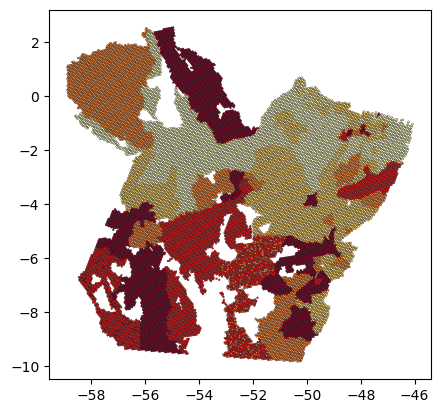

In [60]:
pa_hex_interpolated.plot(column = 'media_rendimento_medio_por_morador_com_renda', scheme='quantiles', cmap='YlOrRd', edgecolor="black", linewidth=0.2);

In [61]:
pa_hex_interpolated.to_csv("/media/gegen07/Expansion/data/pa_interpolated_res_6.csv", index=False)